### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import neattext.functions as nfx
import plotly.express as plx
from sklearn.metrics import classification_report
import keras
from keras.layers import Embedding, Dense, LSTM, GlobalMaxPooling1D, Input
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm

In [2]:
df = pd.read_csv("Suicide_Detection.csv")


In [3]:
df.head(5)

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


### Data Preprocessing

In [4]:
df.shape

(232074, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [6]:
df.isnull() .sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

In [7]:
# Drop the 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)


In [8]:
df

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


### Data visualization

class
suicide        116037
non-suicide    116037
Name: count, dtype: int64


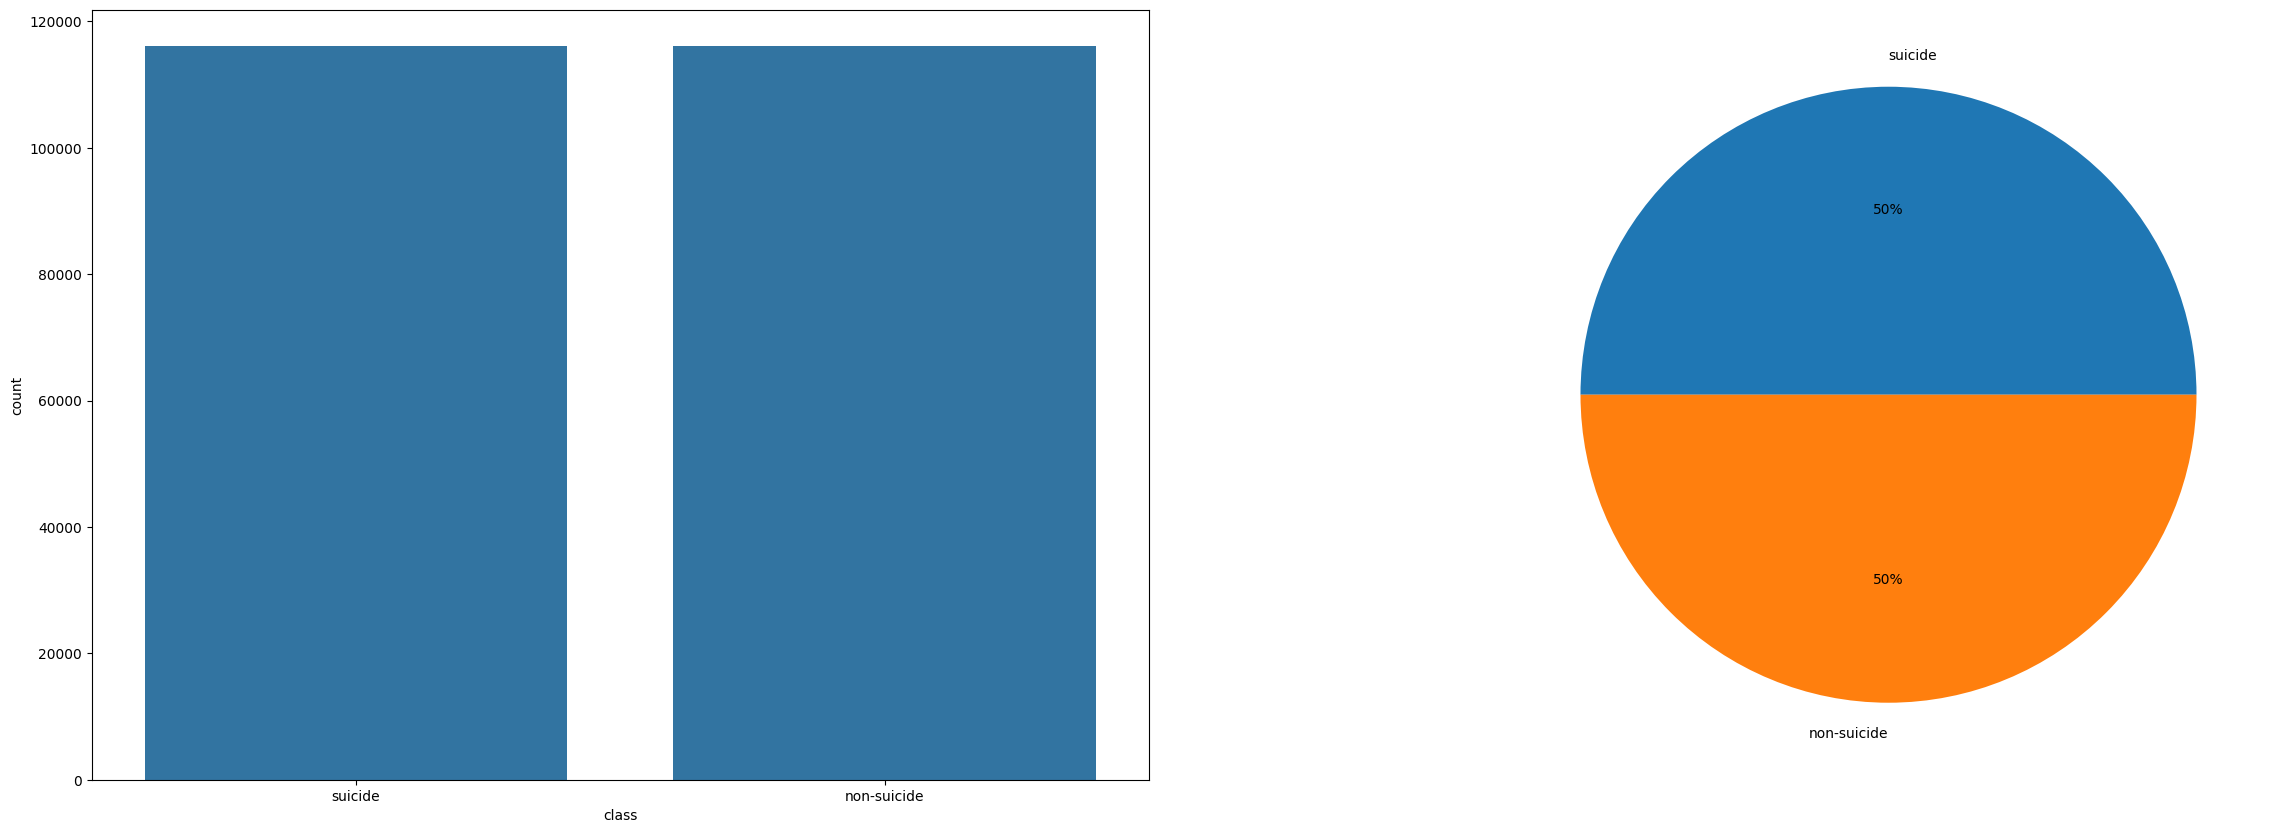

In [9]:
classCnt = df['class'].value_counts()
print(classCnt)
plt.figure(figsize = ((30,10)))

plt.subplot(1,2,1)
sns.countplot(df,x='class')

plt.subplot(1,2,2)
plt.pie(classCnt,labels = classCnt.index,autopct='%.0f%%')

plt.show()

### Text preprocessing

### Tokenization, Stopword ,Stemming,

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [11]:
import nltk
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
#%pip install unidecode -q

Note: you may need to restart the kernel to use updated packages.


In [18]:
import re
#!pip install autocorrect -q
from autocorrect import Speller
#!pip install unidecode -q
import unidecode
#!pip install contractions -q
import contractions
from string import punctuation

In [19]:
def text_cleaning(text):
    # lower case
    text = text.lower()

    # html tags
    html_pattern = r'<.*?>'
    text = re.sub(pattern=html_pattern, repl=' ', string=text)

    # urls
    url_pattern = r'https?://\S+|www\.\S+'
    text = re.sub(pattern=url_pattern, repl=' ', string=text)

    # numbers
    number_pattern = r'\d+'
    text = re.sub(pattern=number_pattern, repl=' ', string=text)

    # unidecode
    text = unidecode.unidecode(text)

    # Expanding Contractions
    text = contractions.fix(text)

    # remove punctutation
    text = text.translate(str.maketrans('', '', punctuation))

    # removing single characters
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    text = re.sub(pattern=single_char_pattern, repl=" ", string=text)

    # Extra spaces
    space_pattern = r'\s+'
    text = re.sub(pattern=space_pattern, repl=" ", string=text)

    return text

In [20]:
stopwords_list = ['i', 'am', 'is','are','this','that','then','those','have','has','it','can','could','the','had','was','were','been','them',
                  'what','whose','whom','who','do','did','does' 'yet', 'though', 'wherein', 'really', 'show', 'then', 'rather', 'same', 'con', 'call', 'is', 'twenty', 'side', 'go', 'namely',
                  'every', 'top', 'for', "'m", 'with', 'either', 'because', 'two', 'well', 'when', 'those', 'under', 'thin', 'amount', 'upon', 
                  'kg', 'the', "that'll", 'ca', 'even', 'very', 'into', 'by', '‘m', 'keep', 'although', 'done', 'bottom', 'detail', 'whatever', 
                  'from', 'formerly', 'these', 'enough', 'twelve', 'of', 'too', 'already', 'move', 'something', 'few', 'nothing', 'they', 'does',
                  'us', 'next', 'cry', 'but', 'eight', '‘s', 'however', 'four', "'ll", 'has', 'over', 'someone', 'afterwards', 'myself', 'have',
                  'would', 'anywhere', 'hereupon', 'using', 'everything', 'his', 'put', 'many', 'more', 'within', 'which', 'describe', 'thereby',
                  'nine', 'elsewhere', 'other', 'he', 'if', 'per', 'your', 's', 'be', 'than', 'now', 'sometime', 'herein', 'why', '‘d', 'whereas',
                  'behind', 'couldnt', 'de', "'re", 'least', 'latter', 'whereafter', 'part', 'after', 'front', 'interest', "you'd", 'whose', 'fire',
                  'sincere', 'down', 'to', 'whence', 'ours', "'s", 'all', 'noone', 'just', 'anyhow', 'ie', 'having', 'her', 'been', 'get', 'former', 
                  'throughout', 'above', '’d', 'cannot', 'almost', 'do', 'quite', 'seem', 'give', 'first', 'several', 'also', 'seems', 'became', '’m',
                  'sixty', 'anyway', '‘re', 'on', "you're", 'onto', 'co', 'third', 'fifty', 'had', 'seemed', '’s', 'yourselves', 'until', 'an', 'mine',
                  'across', 'sometimes', 'hereby', 'eleven', 'might', 'mostly', 'un', 'i', "'d", 'itself', 'most', 'beforehand', 'five', 'beyond',
                  'herself', "you've", 'unless', 'regarding', 'there', 'doesn', 'while', 'whoever', "should've", 'whereupon', 'name', 'further', 'o', 
                  'nobody', 'whereby', 'others', 'between', 'thus', 'any', "you'll", 'found', 'amongst', 'hers', 'wherever', 'ltd', 'still', 'somehow',
                  'often', 'km', 'becoming', 'six', 'can', "'ve", 'make', 'hence', 'around', 'both', 'our', 'along', 'latterly', 'please', 'via', 'whole',
                  'system', 've', 'd', 'you', 'themselves', 'here', 'used', 'in', 'forty', 'each', 'find', 'during', 'ain', 'ten', 'him', 'nevertheless',
                  "she's", 'me', 'them', 'ma', 'meanwhile', 'and', 'y', 'did', 'fifteen', 'serious', '’re', "it's", '’ll', 'that', 'alone', 'together', 
                  'where', 'hereafter', 'once', 'himself', 'could', 'made', 'among', 'whom', 'cant', 'doing', 'again', 'therefore', 'beside', 'hundred',
                  'three', 'etc', 'moreover', 'various', 'may', 'since', 'always', 'seeming', 'toward', 'are', 'll', 'everywhere', 'a', 'empty', 'yours',
                  'theirs', 'back', 'else', 'own', 'as', 'somewhere', 'bill', '‘ll', 're', 'through', 'last', 'nowhere', 'what', 'take', 'computer',
                  'yourself', 'eg', 'perhaps', 'thereupon', 'ourselves', 'against', 'inc', 'she', 'whether', 'their', 'm', 'such', 'thick', 'anything',
                  '’ve', 'neither', 'none', 'amoungst', 'one', 'were', 'thru', 'am', 'about', 'without', 'up', 'otherwise', 'except', 'who', 'due',
                  'thereafter', 'ever', 'much', 'out', 'how', 'whenever', 'before', 'it', 'some', 'being', 'mill', 'or', 'its', 'will', 'become',
                  'besides', 'say', 'therein', 'another', 'see', 'anyone', 'becomes', 'never', 'towards', 'everyone', 'below', 'full', 'my', 'only', 
                  'fill', 'we', 'should', 'thence', 'indeed', 'this', 'was', 'less', 'so', 't', 'at', 'must', 'whither', 'off'
]

In [21]:
def remove_stopwords(text):
  token = word_tokenize(text)
  token_without_stopwords = []
  for words in token:
    if words not in stopwords_list:
      token_without_stopwords.append(words)
  
  text = " ".join(token_without_stopwords)
  return text

In [22]:
df['text'] = df['text'].apply(remove_stopwords)
df.head(10)  

,text,class
0,Ex Wife Threatening SuicideRecently I left wif...,suicide
1,Am I weird I n't affected compliments coming I...,non-suicide
2,Finally 2020 ... So I hear `` 2020 bad year ``...,non-suicide
3,need helpjust help im crying hard,suicide
4,"I ’ lostHello , Adam ( 16 ) I ’ struggling yea...",suicide
5,Honetly idkI dont know im . I feel like . All ...,suicide
6,[ Trigger warning ] Excuse self inflicted burn...,suicide
7,It ends tonight.I ’ anymore . I quit .,suicide
8,Everyone wants `` edgy `` making self consciou...,non-suicide
9,My life 20 years oldHello . I 20 year old bald...,suicide


In [23]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('punkt')
lists = stopwords.words('english') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
# Lower the text 
df['text'] = df['text'].str.lower()


In [25]:
# Remove Punctauation 
df['text'] = df['text'].str.replace(r'[^\w\s]+', '',regex = True)

In [26]:
# Stop word removal 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [27]:
# Tokenization
df['text'] = df['text'].apply(lambda x:nltk.word_tokenize(x))


In [28]:
# Steaming 
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x : [ps.stem(i) for i in x])


In [29]:
df['text']=df['text'].apply(lambda x : ' '.join(x))

In [30]:
df.head() 

,text,class
0,ex wife threaten suiciderec left wife good che...,suicide
1,weird nt affect compliment come know irl feel ...,non-suicide
2,final 2020 hear 2020 bad year swear fuck god a...,non-suicide
3,need helpjust help im cri hard,suicide
4,losthello adam 16 struggl year afraid past yea...,suicide


#

### Machine Learning- Model Selection

In [31]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import neattext.functions as nfx
import plotly.express as plx
from sklearn.metrics import classification_report
import keras
from keras.layers import Embedding, Dense, LSTM, GlobalMaxPooling1D, Input
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm


In [32]:
df=pd.read_csv("Suicide_Detection.csv")
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [33]:
# Drop the 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

vectorizer = TfidfVectorizer()  # Limit the number of features
X = vectorizer.fit_transform(df['text'])

X

<232074x168117 sparse matrix of type '<class 'numpy.float64'>'
	with 16433871 stored elements in Compressed Sparse Row format>

In [39]:
y = np.array(df['class'])
y

array(['suicide', 'non-suicide', 'non-suicide', ..., 'non-suicide',
       'suicide', 'non-suicide'], dtype=object)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Function to calculate specificity
def calculate_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    specificity = []
    for i in range(len(cm)):
        tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
        fp = np.sum(np.delete(cm, i, axis=0)[:, i])
        specificity.append(tn / (tn + fp))
    return np.mean(specificity)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
specificity = calculate_specificity(y_test, y_pred)
lr_result=(accuracy,precision,recall,f1,specificity)
print(f"Logistic Regression Results:")
print(f"Accuracy: {lr_result[0]}")
print(f"Precision: {lr_result[1]}")
print(f"Recall: {lr_result[2]}")
print(f"Specificity: {lr_result[3]}")
print(f"F1 Score: {lr_result[4]}")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
specificity = calculate_specificity(y_test, y_pred)
dt_result=(accuracy,precision,recall,f1,specificity)
print(f"Decision Tree Results:")
print(f"Accuracy: {dt_result[0]}")
print(f"Precision: {dt_result[1]}")
print(f"Recall: {dt_result[2]}")
print(f"Specificity: {dt_result[3]}")
print(f"F1 Score: {dt_result[4]}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the results
print(f"Random Forest Results:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
